<a href="https://www.kaggle.com/code/sahilkhan70/heart-disease-prediction?scriptVersionId=205998320" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart.csv


## **Importing Required Libraries**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [14]:
df = pd.read_csv("/kaggle/input/heart-disease/heart.csv")

In [15]:
# 10 random rows from dataset
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1


## Data Exploration

| **Feature**   | **Description**                                                                                                               |
|---------------|-------------------------------------------------------------------------------------------------------------------------------|
| **age**       | Age in years                                                                                                                  |
| **sex**       | Sex                                                                                                                           |
|               | `1` = Male                                                                                                                    |
|               | `0` = Female                                                                                                                  |
| **cp**        | Chest pain type                                                                                                               |
|               | `0`: Typical angina                                                                                                           |
|               | `1`: Atypical angina                                                                                                          |
|               | `2`: Non-anginal pain                                                                                                         |
|               | `3`: Asymptomatic                                                                                                             |
| **trestbps**  | Resting blood pressure (in mm Hg on admission to the hospital)                                                               |
| **chol**      | Serum cholesterol in mg/dl                                                                                                   |
| **fbs**       | Fasting blood sugar > 120 mg/dl                                                                                              |
|               | `1` = True                                                                                                                    |
|               | `0` = False                                                                                                                   |
| **restecg**   | Resting electrocardiographic results                                                                                         |
|               | `0`: Normal                                                                                                                   |
|               | `1`: ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV)                                   |
|               | `2`: Probable or definite left ventricular hypertrophy by Estes' criteria                                                     |
| **thalach**   | Maximum heart rate achieved                                                                                                  |
| **exang**     | Exercise induced angina                                                                                                      |
|               | `1` = Yes                                                                                                                     |
|               | `0` = No                                                                                                                      |
| **oldpeak**   | ST depression induced by exercise relative to rest                                                                           |
| **slope**     | Slope of the peak exercise ST segment                                                                                        |
|               | `0`: Upsloping                                                                                                                |
|               | `1`: Flat                                                                                                                     |
|               | `2`: Downsloping                                                                                                              |
| **ca**        | Number of major vessels (0-3) colored by fluoroscopy                                                                         |
| **thal**      |                                                                                                                              |
|               | `0`: Error (in original dataset, 0 maps to NaN)                                                                               |
|               | `1`: Fixed defect                                                                                                             |
|               | `2`: Normal                                                                                                                   |
|               | `3`: Reversible defect                                                                                                        |
| **target**    | Target (the label)                                                                                                           |
|               | `0` = No disease                                                                                                              |
|               | `1` = Disease                                                                                                                 |


In [16]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

The gender count is correct, so we can with further analysis.

In [17]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 303 rows and 14 columns.


Although, It is a very small dataset. So we can easily achieve high accuracy with simple models.

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Great, there is no null values in the data.

In [11]:
df.drop(columns=['sex', 'target'], axis = 1).describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


## Data Pre-Processing

By comparing with the actual dataset, find out that the dataset contain some, misleading data points in it, so we have to remove those from our dataset, to move further

The values are incorrect in these columns.

thal (thalassemia) : Thalassemia type, related to red blood cell abnormalities.

- 0: Error (or NaN, possibly an incomplete observation)
- 1: Fixed defect – Indicates a past myocardial infarction or other fixed defect.
- 2: Normal – No defect present.
- 3: Reversible defect – Possible ischemia (temporary reduction in blood flow that may be treatable).

ca (number of major vessels colored by fluoroscopy): The number of major blood vessels (ranging from 0 to 3) that are visible when a fluoroscopic dye is applied.

- Values: Values range from 0 to 3, with higher values indicating more visible vessels.
- Purpose: More visible vessels can indicate less blockage, while fewer visible vessels may suggest restricted blood flow due to blockage.

In [38]:
df[(df['ca'] > 3) | (df['thal'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


so these 7 rows will be removed from the dataset.

In [39]:
# dataset will be

df = df[~((df['ca'] > 3) | (df['thal'] == 0))].copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
df.shape

(296, 14)

## Data Visualization

Text(0, 0.5, 'Count')

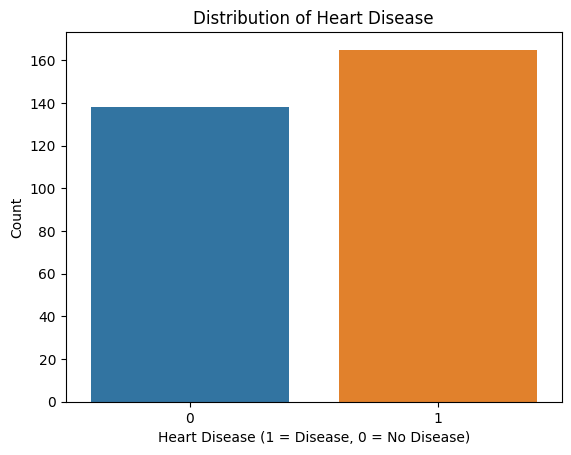

In [22]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Disease, 0 = No Disease)')
plt.ylabel('Count')
# plt.show() # to be honest, you actually don't need this function in notebook, this only needed in .py files to show graph

The dataset is quite balanced.

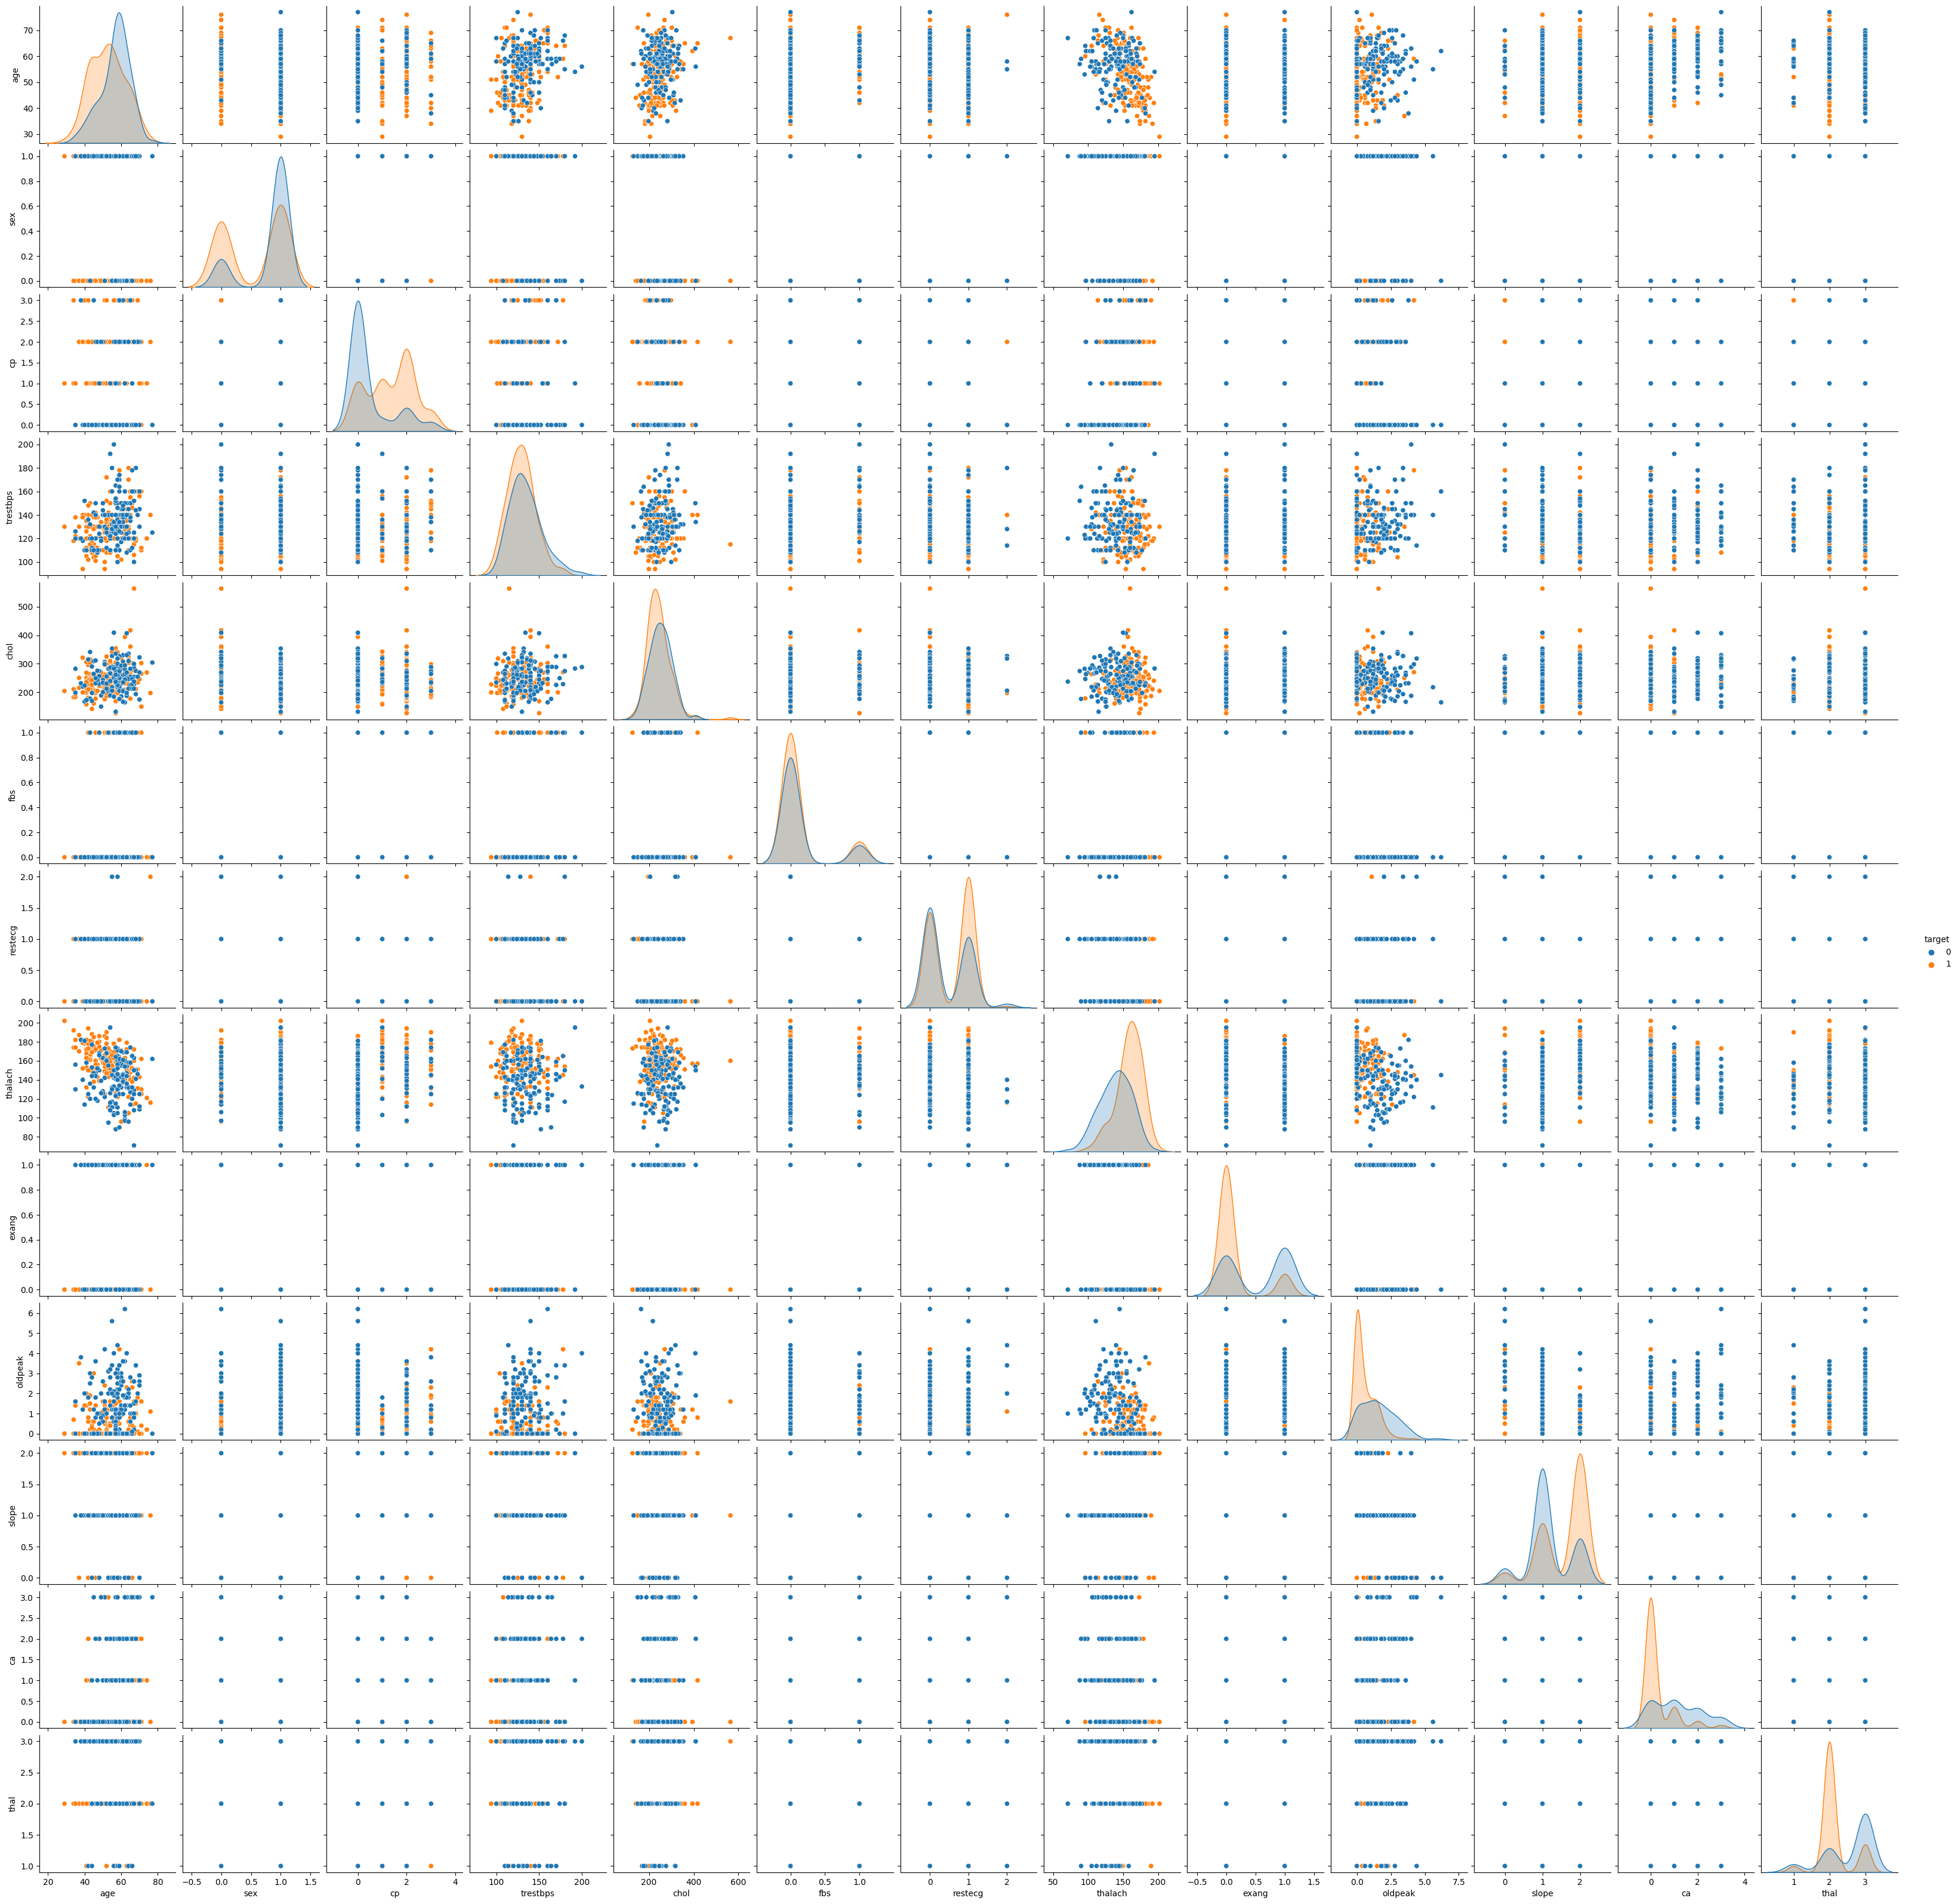

In [41]:
# Plotting each feature with corresponds to all other features
sns.pairplot(df, hue = 'target')

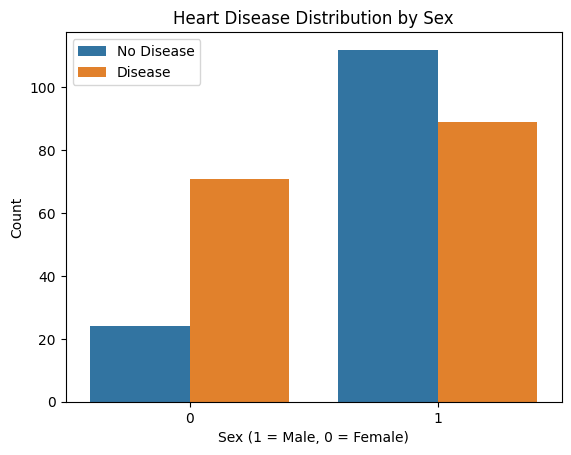

In [42]:
# Plot the distribution of heart disease by sex
sns.countplot(x = 'sex', hue = 'target', data = df)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

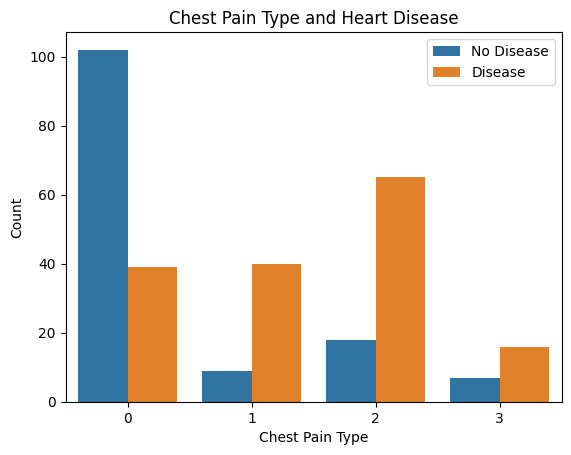

In [44]:
# Plot distribution of chest pain types in relation to heart disease
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

Text(0, 0.5, 'Density')

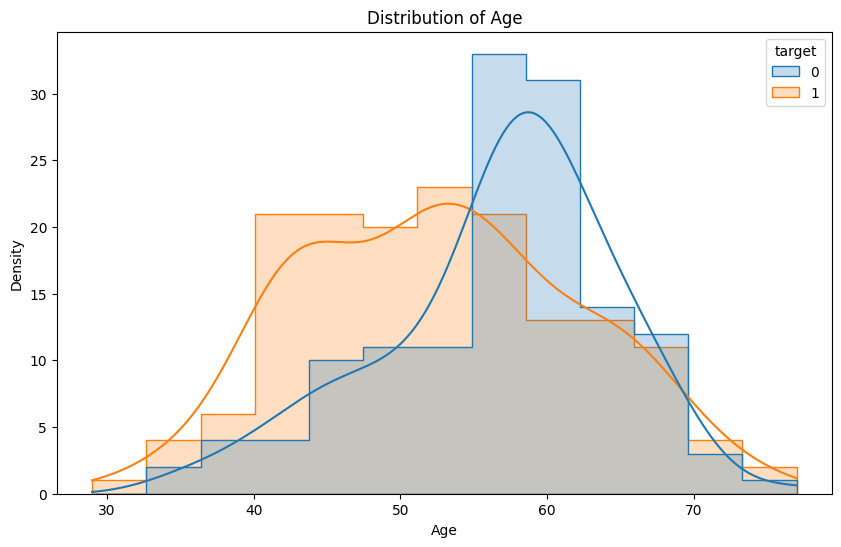

In [45]:
# Plot the distribution of Age w.r.t heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'age', hue='target', kde=True, element='step')
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

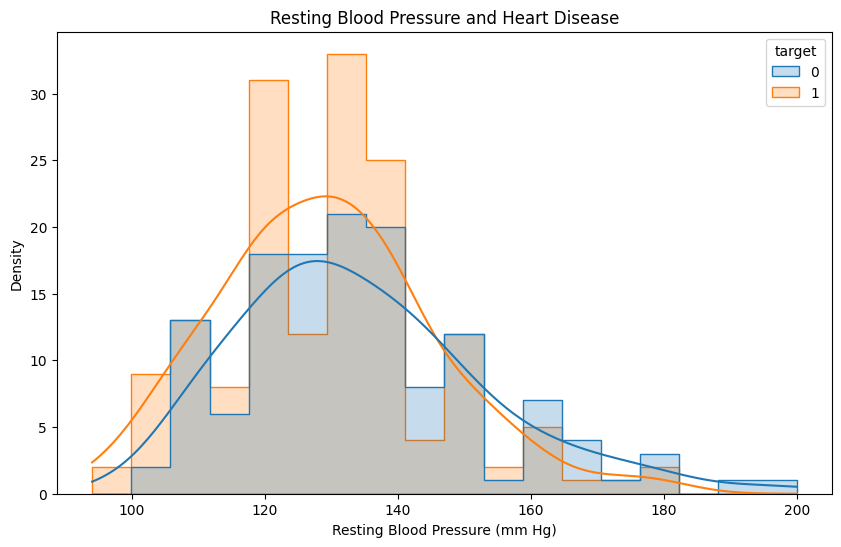

In [47]:
# Distribution of trestbps with respect to heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trestbps', hue='target', kde=True, element='step')
plt.title('Resting Blood Pressure and Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Density')